# HSE 2021: Mathematical Methods for Data Analysis

## Homework 5

### Contents

#### PCA, t-SNE – 4 points
* [Task 1](#task1) (1.5 points)
* [Task 2](#task2) (0.5 points)
* [Task 3](#task3) (0.5 points)
* [Task 4](#task3) (1 points)
* [Task 5](#task4) (0.5 points)

#### Clustering – 6 points
* [Task 5](#task5) (1.5 points)
* [Task 6](#task6) (1.5 points)
* [Task 7](#task7) (1.5 points)
* [Task 8](#task8) (0.5 point)
* [Task 9](#task8) (1 point)

Load the file `data_Mar_64.txt`.

In [3]:
import pandas as pd

data = pd.read_csv('../datasets/data_Mar_64.txt', header = None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,Acer Campestre,0.003906,0.003906,0.027344,0.033203,0.007812,0.017578,0.023438,0.005859,0.000000,...,0.011719,0.000000,0.005859,0.035156,0.027344,0.033203,0.001953,0.000000,0.017578,0.0
1,Acer Campestre,0.005859,0.013672,0.027344,0.025391,0.013672,0.029297,0.019531,0.000000,0.001953,...,0.017578,0.000000,0.021484,0.017578,0.046875,0.005859,0.003906,0.003906,0.046875,0.0
2,Acer Campestre,0.011719,0.001953,0.027344,0.044922,0.017578,0.042969,0.023438,0.000000,0.003906,...,0.035156,0.000000,0.015625,0.021484,0.056641,0.009766,0.003906,0.000000,0.015625,0.0
3,Acer Campestre,0.013672,0.011719,0.037109,0.017578,0.011719,0.087891,0.023438,0.000000,0.000000,...,0.015625,0.001953,0.021484,0.029297,0.033203,0.003906,0.000000,0.001953,0.027344,0.0
4,Acer Campestre,0.007812,0.009766,0.027344,0.025391,0.001953,0.005859,0.015625,0.000000,0.005859,...,0.023438,0.001953,0.021484,0.048828,0.056641,0.019531,0.000000,0.000000,0.013672,0.0


This [dataset](https://archive.ics.uci.edu/ml/datasets/One-hundred+plant+species+leaves+data+set) consists of work carried out by James Cope, Charles Mallah, and James Orwell, Kingston University London. The Leaves were collected in the Royal Botanic Gardens, Kew, UK.

For Each feature, a 64 element vector is given per sample of leaf. One file for each 64-element feature vectors. **Each row begins with the class label**. Here is the plant leaf **classification task**. The remaining 64 elements is the feature vector.

In [4]:
#Sixteen samples of leaf each of one-hundred plant species
data.shape

(1600, 65)

The first column is the target, put it in a separate variable.

In [5]:
import numpy as np

X, y_name = np.array(data.iloc[:, 1:]), data.iloc[:, 0]

**Task 1. <a id="task1"></a> (1.5 points)** Let's do the following pipeline (detailed instructions will be in next cells)

- Encode your textual target.
- Split your data into train and test. Train a simple classification model without any improvements and calculate metrics.
- Then let's look at the low dimensional representations of the features and look at the classes there. We will use linear method PCA and non-linear t-SNE (t-distributed stochastic neighbor embedding). In this task we learn how to visualize data at the low dimensional space and check whether the obtained points are separable or not.

The target variable takes a text value. Use the `LabelEncoder` from `sklearn` to encode the text variable `y_name` and save the resulting values to the variable `y`.

In [6]:
from sklearn.preprocessing import LabelEncoder

## your code here
le = LabelEncoder()
y = le.fit_transform(y_name)

Split your data into **train** and **test** in proportion 1:4.

In [7]:
## your code here
from sklearn.model_selection import train_test_split

features_train, features_test, target_train, target_test = train_test_split(X, y, test_size = 0.2, random_state = 12345)

Train SVM with linear kernel on your data to predict target. Calculate accuracy, F-score.

In [8]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.svm import SVC

## your code here
model = SVC(kernel = 'linear', random_state = 12345)
model.fit(features_train, target_train)
accuracy = accuracy_score(target_test, model.predict(features_test))
print("Accuracy:", accuracy)
f1 = f1_score(target_test, model.predict(features_test), average = 'weighted')
print("F1 score:", f1)

Accuracy: 0.015625
F1 score: 0.011016865079365081


Let's try Principal Component Analysis. Use the `PCA` method from `sklearn.decomposiion` to reduce the dimension of the feature space to two. Fix `random_state=42`

In [9]:
## your code here
from sklearn.decomposition import PCA

pca = PCA(n_components = 2, random_state = 42).fit_transform(X)

Select objects that match values from 0 to 15 of the target variable `y`. Draw the selected objects in a two-dimensional feature space using the `scatter` method from `matplotlib.pyplot`. To display objects of different classes in different colors, pass `c = y[y<=15]` to the `scatter` method.

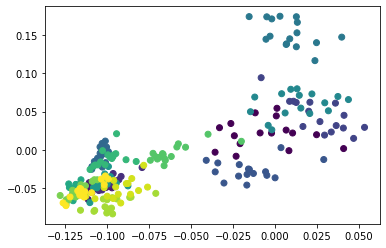

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

## your code here

## your code here
c = y[y <= 15]
plt.scatter(pca[y < 16][:, 0], pca[y < 16][:, 1], c = c);

Do the same procedure as in two previous cells, but now for the `TSNE` method from `sklearn.manifold`.

C:\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


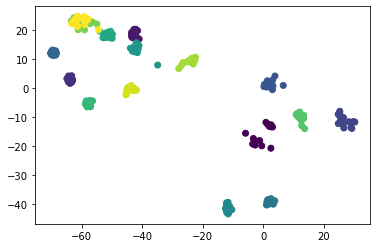

In [11]:
## your code here
## your code here
# from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2, random_state = 42).fit_transform(X)
c = y[y <= 15]
plt.scatter(tsne[y < 16][:, 0], tsne[y < 16][:, 1], c=c);

**Task 2. <a id="task2"></a> (0.5 points)** Specify the coordinates of the object with index 1 (`X[1]`) after applying the TSNE method. Round the numbers to hundredths.

In [12]:
## your code here

cords_1_tsne = np.round(tsne[1], 2)

**Task 3. <a id="task3"></a> (0.5 points)** Specify the coordinates of the object with index 1 (`X[1]`) after applying the PCA method. Round the numbers to hundredths.

In [13]:
## your code here

cords_1_pca = np.round(pca, 2)

**Task 4. <a id="task4"></a> (1 points)** What conclusions can be drawn from the obtained images? Choose the right one(s).

1) Using the principal components method, it was possible to visualize objects on a plane and objects of different classes are visually separable

2) Using the TSNE method, it was possible to visualize objects on a plane and objects of different classes are visually separable

3) Using the TSNE and PCA methods, it was possible to visualize objects on a plane and objects of different classes are visually separable

4) Using the TSNE and PCA methods, it was possible to visualize objects on a plane and objects of different classes are not visually separable

Ответ: 2.
Визуализация разделения только в TSNE.

**Task 5. (0.5 points)** Again try to fit your simple classifier, this time using transformed data to two-dimensional space. To do it choose the best feature representation in your opinion from two existing. Did the metrics improve?

In [14]:
## your code here
## your code here
from sklearn.metrics import accuracy_score, f1_score
## your code here
from sklearn.svm import SVC

print("TSNE")
features_train, features_test, target_train, target_test = train_test_split(tsne, y, test_size = 0.2, random_state = 12345)

model = SVC(kernel = 'linear', random_state = 12345)
model.fit(features_train, target_train)
accuracy = accuracy_score(y_true = target_test, y_pred = model.predict(features_test))
print("Accuracy:", accuracy)
f1 = f1_score(y_true=target_test, y_pred = model.predict(features_test), average = 'weighted')
print("F1 score:", f1)

TSNE
Accuracy: 0.634375
F1 score: 0.6107643571706072


In [15]:
## your code here
from sklearn.metrics import accuracy_score, f1_score
## your code here
from sklearn.svm import SVC

print("PCA")
features_train, features_test, target_train, target_test = train_test_split(pca, y, test_size = 0.25, random_state = 12345)

model = SVC(kernel = 'linear', random_state = 12345)
model.fit(features_train, target_train)
accuracy = accuracy_score(y_true = target_test, y_pred = model.predict(features_test))
print("Accuracy:", accuracy)
f1 = f1_score(y_true = target_test, y_pred = model.predict(features_test), average='weighted')
print("F1 score:", f1)

PCA
Accuracy: 0.01
F1 score: 0.0002716723052857507


## K_means

**Task 6. <a id="task5"></a> (1.5 points)** Implement the MyKMeans class.

The class must match the template shown below. Please, add code where needed. Some guidelines are the following:

The class constructor is passed to:
- n_clusters - the number of clusters that the data will be split into

- n_iters - the maximum number of iterations that can be done in this algorithm

Realize `update_centers` and `update_labels` methods.


In the `fit` method:

- Write sequential call of `self_centers` and `self_labels`.

then in the loop by the number of iterations you need to implement:
- calculate the nearest cluster center for each object
- recalculate the center of each cluster (the average of each of the coordinates of all objects assigned to this cluster)
put the calculated new cluster centers in the `new_centers` variable

In the `predict` method:

the nearest cluster centers for `X` objects are calculated

In [16]:
from IPython.display import clear_output
from sklearn.metrics import pairwise_distances_argmin
import collections


def plot_clust(X, centers, lables, ax):
    ax.scatter(X[:, 0], X[:, 1], c = lables)
    ax.scatter(centers[:, 0], centers[:, 1], marker = '>', color='red')


class MyKMeans():
    def __init__(self, n_clusters=3, n_iters=100, seed=None):
        self.n_clusters = n_clusters
        self.labels = None
        self.centers = None
        self.n_iters = n_iters
        self.seed = 0 if seed is None else seed
        np.random.seed(self.seed)

    def update_centers(self, X):
        ## your code here
        # summ = 0
        centers = []
        mean_values = {}

        merge_values = {self.labels[i]: X[i] for i in range(len(self.labels))}

        for assignment, point in merge_values.items():
            mean_values.setdefault(assignment, []).append(point)

        for points in mean_values.values():
            center = np.mean(points, axis = 0)
            centers.append(center)

        centers = np.array(centers)
        return centers

    def update_labels(self, X):
        ## your code here
        labels = pairwise_distances_argmin(X, self.centers)
        return labels

    def fit(self, X):
        self.centers = X[np.random.choice(len(X), self.n_clusters, replace=False)]  ## your code here
        self.labels = self.update_labels(X)  ## your code here

        for it in range(self.n_iters):
            new_labels = self.update_labels(X)
            self.labels = new_labels

            new_centers = self.update_centers(X)
            if np.allclose(self.centers.flatten(), new_centers.flatten(), atol=1e-1):
                self.centers = new_centers
                self.labels = new_labels
                print('Converge by tolerance centers')

                fig, ax = plt.subplots(1, 1)
                plot_clust(X, new_centers, new_labels, ax)
                return 0

            self.centers = new_centers

            fig, ax = plt.subplots(1, 1)
            plot_clust(X, new_centers, new_labels, ax)
            plt.pause(0.3);
            clear_output(wait=True);

        return 1

    def predict(self, X):
        labels = self.update_labels(X)  ## your code here
        return labels

Generating data for clustering

In [17]:
from sklearn import datasets

n_samples = 1000

noisy_blobs = datasets.make_blobs(n_samples = n_samples,
                                  cluster_std = [1.0, 0.5, 0.5],
                                  random_state = 0)

In [18]:
X, y = noisy_blobs

**Task 7. <a id="task6"></a> (1.5 points)**

7.1 Cluster noisy_blobs objects with `MyKMeans`, use the hyperparameters `n_clusters=3`, `n_iters=3`. Plot result. Specify the result label for the object with index 0.

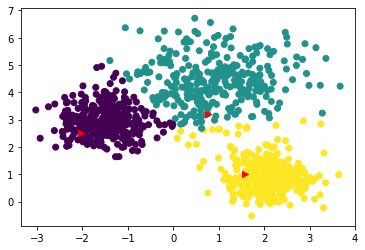

In [19]:
## your code here
model = MyKMeans(n_iters = 3)  #clasters default 3 in class
model.fit(X)
plt.show()

In [20]:
print(f'Result label for the object with index 0'
      f'\n'
      f'center of the {model.predict(X)[0]}st cluster: {model.update_centers(X)[0]}')

Result label for the object with index 0
center of the 0st cluster: [-2.02992244  2.50710735]


7.2 Cluster noisy_blobs objects, use the hyperparameters `n_clusters=3`, `n_iters = 100`. Plot result. Specify the result label for the object with index 0.

Converge by tolerance centers


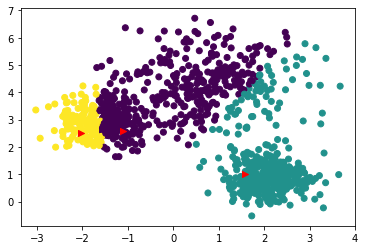

In [21]:
## your code here
model = MyKMeans(n_iters = 100)  #clasters default 3 in class
model.fit(X)
plt.show()

In [22]:
print(f'Result label for the object with index 0'
      f'\n'
      f'center of the {model.predict(X)[0]}st cluster: {model.update_centers(X)[0]}')

Result label for the object with index 0
center of the 0st cluster: [-1.10440621  2.58008535]


7.3 Calculate how many objects changed the label of the predicted cluster when changing the hyperparameter n_iters from 3 to 100

Converge by tolerance centers


0

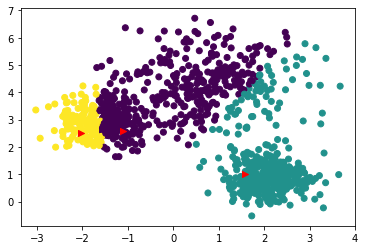

In [23]:
## your code here
model3 = MyKMeans(n_iters = 3)
model3.fit(X)
model100 = MyKMeans(n_iters = 100)
model100.fit(X)
# print(len(model3.predict(X)[0]))
# print(len(model3.predict(X)))
num_of_changed = (model3.predict(X)[0] != model100.predict(X)[0]).sum()
# num_of_changed = len(model3.predict(X)[0]) - num_of_changed
num_of_changed

**Task 8. <a id="task6"></a> (1.5 points)**

Using the elbow method, select the optimal number of clusters, show it on the plot. As a metric, use the sum of the squares of the distances between the data points and the centroids of the clusters assigned to them divided by number of clusters. To do this, iterate the parameter k from 2 to 50 in steps of 2.

Converge by tolerance centers


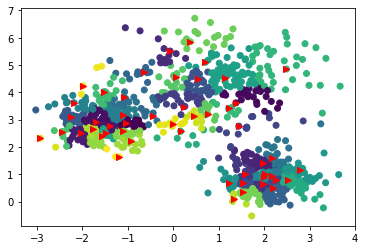

In [26]:
from scipy.spatial.distance import cdist
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans

## your code here
distortions = []
metrics_for_plot = []
for k in range(2, 51, 2):
    model =KMeans(n_clusters = k)
    model.fit(X)

    k_mean_model = MyKMeans(n_clusters = k)
    k_mean_model.fit(X)
    metric = 0
    counts = collections.Counter(k_mean_model.labels)
    distortion = sum(np.min(cdist(X, k_mean_model.centers,
                                  'euclidean'), axis=1)) / X.shape[0]
    distortions.append(distortion)
    #distortions.append(model.inertia_)

ValueError: x and y must have same first dimension, but have shapes (25,) and (0,)

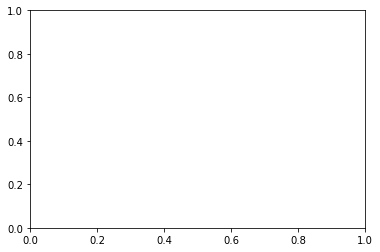

In [25]:
plt.plot(range(2, 51, 2), metrics_for_plot, label='dependence')
plt.legend(loc='upper right')
plt.figure(figsize=(10, 15))
plt.show()

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Distortion of elbow method and optimal parametr k')
plt.plot(range(2, 51, 2), distortions, 'bx-')

plt.ylabel('distortion')
plt.xlabel('K')

plt.show()

In [ ]:
from sklearn.metrics import pairwise_distances

## your code here
metrics_for_plot = []

model = MyKMeans(n_clusters = 15)
model.fit(X)

## DBSCAN

**Task 9. <a id="task7"></a> (0.5 points)** Cluster noisy_blobs objects using DBSCAN. Use the DBSCAN implementation from sklearn. Fix the `eps=0.3` hyperparameter. Plot result. Specify the response for the object with index 2.

In [ ]:
from sklearn.cluster import DBSCAN

## your code here
eps = 0.3
model = DBSCAN(eps = eps)
model.fit(X)
predictions = model.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c = model.labels_)
print(predictions[2])

**Task 10. <a id="task8"></a> (1 point)**

Try different settings of ```eps``` distances (from 0.1 to 0.5) and several values of your choice of ```min_samples```. For each setting plot results. Also output the number of clusters and outliers (objects marked as -1).

In [ ]:
## your code here
for eps in np.arange(0.1, 0.5, 0.1):
    for sample in range(1, 6):
        model = DBSCAN(eps = eps, min_samples = sample)
        model.fit(X)
        predictions = model.fit_predict(X)
        plt.scatter(X[:, 0], X[:, 1], c = model.labels_)

        plt.show()
        tmp_sum = 0
        for i in np.unique(model.labels_):
            if i != -1:
                tmp_sum += 1
        print('number of clusters:', tmp_sum)
        tmp_sum = 0
        for i in model.labels_:
            if i == -1:
                tmp_sum += 1
        print('outliers:', tmp_sum)